In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import time

In [2]:
n = 5
A = np.random.rand(n,n)

In [3]:
A

array([[0.08874623, 0.84995114, 0.79803078, 0.77126621, 0.13167863],
       [0.40490879, 0.76673558, 0.75706018, 0.80154006, 0.61825499],
       [0.98228885, 0.85639592, 0.29700883, 0.32409756, 0.41869632],
       [0.17971668, 0.25029393, 0.13998117, 0.76639715, 0.68473684],
       [0.40529436, 0.03985339, 0.81737346, 0.53683489, 0.30785769]])

In [4]:
%timeit sp.linalg.lu(A)

51.8 µs ± 18.5 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


### LU-Zerlegung

In [5]:
def lu_time(sizes):
    time_meassured = []
    for n in sizes:
        A = np.random.rand(n,n)
        tic = time.time_ns()
        (P,L,U) = sp.linalg.lu(A)
        toc = time.time_ns()
        time_meassured.append(toc - tic)
        print(f'Lu of size {n}x{n}: took {(toc - tic)//(10**6)}[ms]')
        
    return np.array(time_meassured)

def plot_lu_time(sizes,plot_estimates = True):
    time_meass = lu_time(sizes)
    
    fig,(ax,ax_log) = plt.subplots(2,1,figsize=(8,8))
    ax.set_title('Zeitaufwand LU-Zerlegung')
    ax.grid()
    ax_log.grid()
    ax.scatter(sizes,time_meass*10**(-9),marker='d',c='dodgerblue',label='meassured time')
    ax.set_xticks(sizes,sizes)
    ax.set_xlabel('size of matrix')
    ax.set_ylabel('time in seconds')
    ax_log.scatter(sizes,time_meass*10**(-9),marker='d',c='dodgerblue',label='meassured time')
    ax_log.set_yscale('log') 
    ax_log.set_xlabel('size of matrix')
    ax_log.set_ylabel('time in seconds')
    ax_log.set_xticks(sizes,sizes)
    
    if(plot_estimates):
        lamb_estimates = lambda x: 2/3*x**3 - 1/2*x**2
        opp_complexity = np.array([lamb_estimates(n) for n in sizes])
        
        #least squares for estimating flops: b = time, A = complexity, minimize ||Ax-b||      
        A = np.array([[lamb_estimates(n)] for n in sizes])
        B = np.transpose(A)@A
        B_inv = np.linalg.inv(B)
        time_const = B_inv@np.transpose(A)@(time_meass*10**(-9))
        est_flops = 1/time_const
        
        print(f'estimated flops: {est_flops}')
        ax.plot(sizes,opp_complexity*time_const,c='goldenrod',label = 'estimated time')
        ax_log.plot(sizes,opp_complexity*time_const,c='goldenrod',label = 'estimated time')
    ax.legend()
    ax_log.legend()
    fig.tight_layout()
    return time_meass
    

Lu of size 1000x1000: took 17[ms]
Lu of size 2000x2000: took 67[ms]
Lu of size 4000x4000: took 374[ms]
Lu of size 8000x8000: took 2251[ms]
estimated flops: [1.5075779e+11]


array([  17450000,   67387000,  374886000, 2251890000])

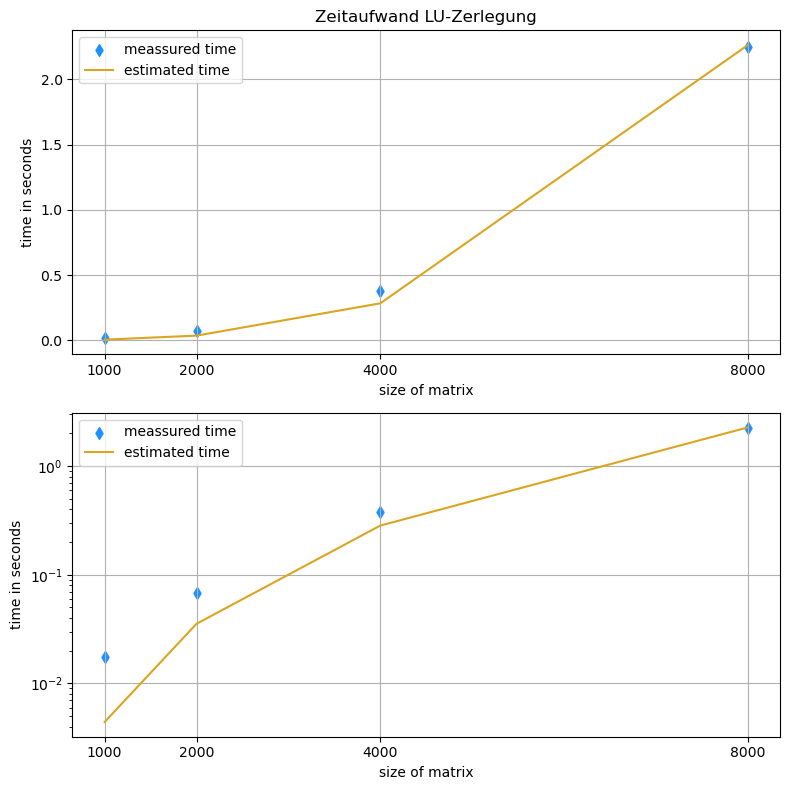

In [6]:
plot_lu_time([1000, 2000, 4000, 8000])

### Lösen eines Gleichungssystems

In [7]:
def solve_time(sizes):
    time_meassured = []
    for n in sizes:
        A = 1000*np.random.rand(n,n)
        b = 1000*np.random.rand(n,1)
        
        (P,L,U) = sp.linalg.lu(A)
        tic = time.time_ns()
        y = L/(P@b); x = U/y
        toc = time.time_ns()
        time_meassured.append(toc - tic)
        print(f'solve LGS of size {n}x{n}: took {(toc - tic)//(10**6)}[ms]')
        
        
    return np.array(time_meassured)

def plot_solve_time(sizes):
    time_meass = solve_time(sizes)
    
    fig,(ax,ax_log) = plt.subplots(2,1,figsize=(8,8))
    ax.set_title('Zeitaufwand Lösen eines LGS')
    ax.grid()
    ax_log.grid()
    ax.scatter(sizes,time_meass*10**(-9),marker='d',c='dodgerblue',label='meassured time')
    ax.set_xticks(sizes,sizes)
    ax.set_xlabel('size of matrix')
    ax.set_ylabel('time in seconds')
    ax_log.scatter(sizes,time_meass*10**(-9),marker='d',c='dodgerblue',label='meassured time')
    ax_log.set_yscale('log') 
    ax_log.set_xlabel('size of matrix')
    ax_log.set_ylabel('time in seconds')
    ax_log.set_xticks(sizes,sizes)
    
    ax.legend()
    ax_log.legend()
    fig.tight_layout()
    

/var/folders/dz/bzxsk9tj3clf0cs7vg6r7h_80000gn/T/ipykernel_32278/2158776147.py:9: RuntimeWarning: divide by zero encountered in divide
  y = L/(P@b); x = U/y


solve LGS of size 1000x1000: took 3[ms]
solve LGS of size 2000x2000: took 7[ms]
solve LGS of size 4000x4000: took 39[ms]
solve LGS of size 8000x8000: took 222[ms]


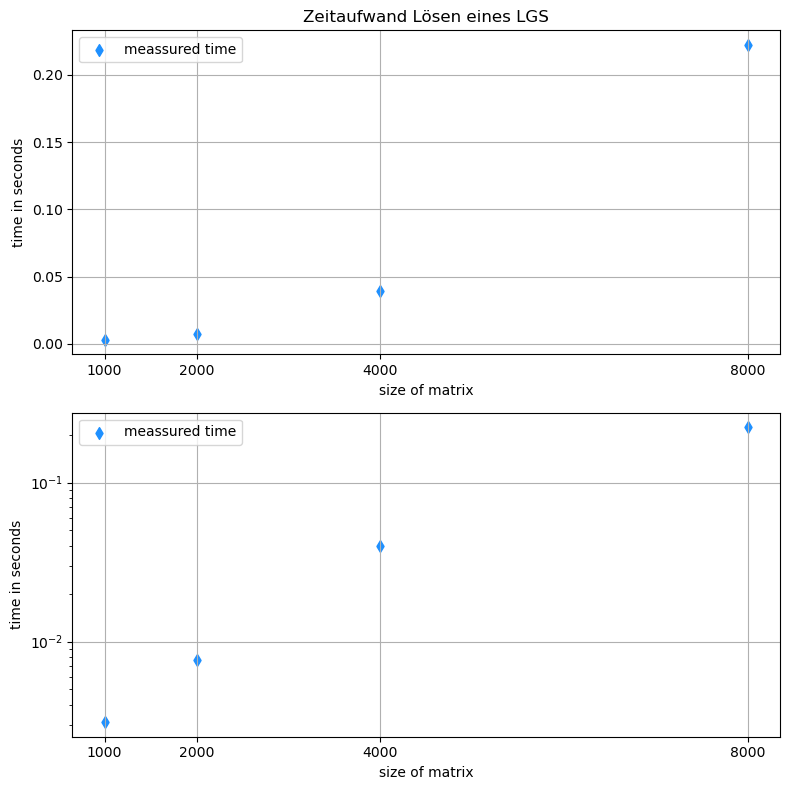

In [8]:
plot_solve_time([1000, 2000, 4000, 8000])